## Import the modules

In [35]:
#pip install librosa
#pip install praat-parselmouth

SyntaxError: invalid syntax (<ipython-input-35-d2a5aa5f1fb0>, line 3)

In [36]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.6-cp37-none-any.whl size=8531 sha256=00fa8a4ebbf8ca410bc73c47890255efce5a2549631929bab784dfddf75df5de
  Stored in directory: C:\Users\Aeesha\AppData\Local\pip\Cache\wheels\b8\c6\01\330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa 
import librosa.display
import IPython.display as ipd
import parselmouth
import seaborn as sns
from parselmouth.praat import call
import glob
import os.path

## Load the files

In [2]:
#file1 = "ID00_hc_0_0_0.wav"
#folder = r"C:\Users\Aeesha\Documents\CMU\Research\Code\KCL\ReadText\HC\*.wav"
folder = r"dataset\ReadText\HC\*.wav"

## Plot the soundwaves

In [5]:
sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound(file1)
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

PraatError: Cannot open file “c:\Users\Aeesha\Documents\CMU\Research\Code\Research_Project\ID00_hc_0_0_0.wav”.
Sound not read from sound file “c:\Users\Aeesha\Documents\CMU\Research\Code\Research_Project\ID00_hc_0_0_0.wav”.

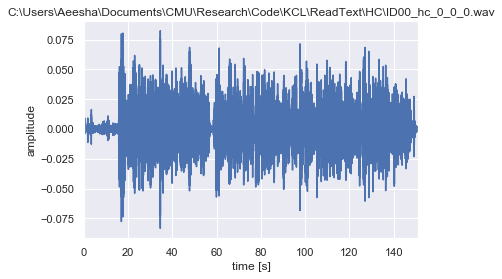

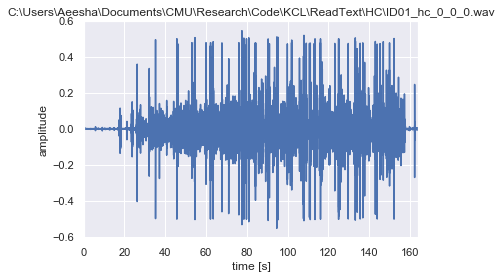

In [ ]:
for file in glob.glob(folder):
    # Plot nice figures using Python's "standard" matplotlib library
    snd = parselmouth.Sound(file)
    plt.figure()
    plt.plot(snd.xs(), snd.values.T)
    plt.xlim([snd.xmin, snd.xmax])
    plt.xlabel("time [s]")
    plt.ylabel("amplitude")
    plt.title(file)
    plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

## Extract the acoustic features

In [4]:
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    duration = call(sound, "Get total duration") # duration
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, f0min, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
    ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
    ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
    localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    
    return duration, pitch, meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer

In [9]:
sound = parselmouth.Sound(file1)
measurePitch(sound, 75, 500, "Hertz")

(151.114716553288,
 180.43397621548044,
 51.65305699454553,
 13.292052871834843,
 0.02703892606864985,
 0.00015085017080090733,
 0.012019464809632577,
 0.013196559495227715,
 0.03605839442889773,
 0.11343944118018381,
 1.1240251477963108,
 0.046161411462677285,
 0.06737102810865625,
 0.11885104724634277,
 0.13848423438803187)

In [8]:
file_list = []
duration_list = []
pitch_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
localJitter_list = []
localabsoluteJitter_list = []
rapJitter_list = []
ppq5Jitter_list = []
ddpJitter_list = []
localShimmer_list = []
localdbShimmer_list = []
apq3Shimmer_list = []
aqpq5Shimmer_list = []
apq11Shimmer_list = []
ddaShimmer_list = []

# Go through all the wave files in the folder and measure pitch
for file in glob.glob(folder):
    sound = parselmouth.Sound(file)
    (duration, pitch, meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer) = measurePitch(sound, 75, 500, "Hertz")
    file_list.append(file) # make an ID list
    duration_list.append(duration)
    pitch_list.append(pitch)
    mean_F0_list.append(meanF0) # make a mean F0 list
    sd_F0_list.append(stdevF0) # make a sd F0 list
    hnr_list.append(hnr)
    localJitter_list.append(localJitter)
    localabsoluteJitter_list.append(localabsoluteJitter)
    rapJitter_list.append(rapJitter)
    ppq5Jitter_list.append(ppq5Jitter)
    ddpJitter_list.append(ddpJitter)
    localShimmer_list.append(localShimmer)
    localdbShimmer_list.append(localdbShimmer)
    apq3Shimmer_list.append(apq3Shimmer)
    aqpq5Shimmer_list.append(aqpq5Shimmer)
    apq11Shimmer_list.append(apq11Shimmer)
    ddaShimmer_list.append(ddaShimmer)
df = pd.DataFrame(np.column_stack([file_list, duration_list, mean_F0_list, sd_F0_list, hnr_list, localJitter_list, localabsoluteJitter_list, rapJitter_list, ppq5Jitter_list, ddpJitter_list, localShimmer_list, localdbShimmer_list, apq3Shimmer_list, aqpq5Shimmer_list, apq11Shimmer_list, ddaShimmer_list]),
                               columns=['voiceID', 'duration','meanF0Hz', 'stdevF0Hz', 'HNR', 'localJitter', 'localabsoluteJitter', 'rapJitter', 
                                        'ppq5Jitter', 'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'apq5Shimmer', 
                                        'apq11Shimmer', 'ddaShimmer'])  #add these lists to pandas in the right order
#pcaData = runPCA(df)

#df = pd.concat([df, pcaData], axis=1)

# Write out the updated dataframe
df.to_csv("processed_results.csv", index=False)

In [10]:
df['label'] = 0
df.to_csv("processed_results_2.csv", index=False)
df

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,label
0,dataset\ReadText\HC\ID00_hc_0_0_0.wav,151.114716553288,180.43397621548044,51.65305699454553,13.292052871834843,0.02703892606864985,0.00015085017080090733,0.012019464809632577,0.013196559495227715,0.03605839442889773,0.11343944118018381,1.1240251477963108,0.046161411462677285,0.06737102810865625,0.11885104724634277,0.13848423438803187,0
1,dataset\ReadText\HC\ID01_hc_0_0_0.wav,164.1050566893424,190.75197198893875,34.88759594252332,11.243993042014012,0.016118362889391245,8.456592291552004e-05,0.006763636173603753,0.007167552570513677,0.02029090852081126,0.07905254236359327,0.7406655150625135,0.029395862030269424,0.038307513272288936,0.061698257222241544,0.08818758609080828,0
2,dataset\ReadText\HC\ID03_hc_0_0_0.wav,139.55532879818594,124.47736568499373,26.621493379505587,13.423983046094449,0.026740064696892215,0.00021580074543128442,0.010862377831435562,0.011511974658529215,0.03258713349430668,0.10256486926971708,0.9740954278113558,0.03904245879662852,0.05813148492079492,0.1064740467827402,0.11712737638988557,0
3,dataset\ReadText\HC\ID05_hc_0_0_0.wav,110.92691609977324,182.55720725507527,39.933611743589175,12.235210170580997,0.020700917924830396,0.00011365793695014805,0.00897929121489763,0.008982598956014502,0.02693787364469289,0.08038799168075889,0.8116529328116474,0.02575868839458584,0.037847304756630465,0.0783774219263274,0.07727606518375753,0
4,dataset\ReadText\HC\ID08_hc_0_0_0.wav,146.10476190476192,195.96979593471684,41.44698345465698,14.669164655005956,0.015062727051669144,7.707495704731853e-05,0.0053705059427931546,0.006017032133239912,0.016111517828379465,0.08201570037603148,0.8273427850022541,0.029086895424582142,0.04395102153521483,0.08297290604935702,0.08726068627374642,0
5,dataset\ReadText\HC\ID09_hc_0_0_0.wav,125.47598639455782,168.01246114571,35.49351032415919,13.020617974943066,0.02179022277515428,0.00012973895098156513,0.009272796269971434,0.009861732508453389,0.027818388809914302,0.07827382566914806,0.7860473609865836,0.024992462179804782,0.03941406207252688,0.07926043340866003,0.07497738653941435,0
6,dataset\ReadText\HC\ID10_hc_0_0_0.wav,136.77233560090704,203.1309522949641,48.609299303115776,12.333992715750018,0.02716443286262544,0.0001335809342808288,0.012623553256357434,0.013000959074992949,0.03787065976907231,0.10284410707482054,0.9940575079091685,0.03993155893934,0.053413564735910204,0.09033020364065783,0.11979467681802,0
7,dataset\ReadText\HC\ID11_hc_0_0_0.wav,148.38630385487528,197.5037725703754,36.63165712667552,15.683276910583018,0.017655525401152946,8.9562619691334e-05,0.007170719827651462,0.007674238989055971,0.021512159482954388,0.0781809058854398,0.7573542885815401,0.029970280012787787,0.03930601195366287,0.06513035661797496,0.08991084003836336,0
8,dataset\ReadText\HC\ID12_hc_0_0_0.wav,130.53124716553287,199.0812793222119,41.08194674097381,11.784297292845414,0.024916843128555206,0.0001252498883448571,0.01139633323038181,0.011914854598932097,0.03418899969114543,0.09661875531979959,0.9639742877246593,0.03389495357451185,0.0493708592754464,0.09772628873734726,0.10168486072353555,0
9,dataset\ReadText\HC\ID14_hc_0_0_0.wav,168.41766439909298,157.11326387636137,46.41917087350133,13.388906148697178,0.03411347162257537,0.00021695573291225949,0.01749906927293671,0.01658546741663847,0.052497207818810135,0.11962449126873735,1.104117799504485,0.05372765452840887,0.05897551875898657,0.08560853606035346,0.1611829635852266,0


## Extract MFCC

In [14]:
snd = parselmouth.Sound(file1)
print(snd)

Object type: Sound
Object name: <no name>
Date: Sat Oct 10 20:53:00 2020

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 151.114716553288 seconds
   Total duration: 151.114716553288 seconds
Time sampling:
   Number of samples: 6664159
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -0.0834350586 Pascal
   Maximum: 0.0823974609 Pascal
   Mean: -1.86604172e-05 Pascal
   Root-mean-square: 0.00760497272 Pascal
Total energy: 0.00873981181 Pascal² sec (energy in air: 2.18495295e-05 Joule/m²)
Mean power (intensity) in air: 1.44589025e-07 Watt/m² = 51.6 dB
Standard deviation in channel 1: 0.00760495039 Pascal



In [26]:
mfcc_object = snd.to_mfcc(number_of_coefficients=12)
mfcc = mfcc_object.to_array()
#mfcc_matrix = mfcc_matrix.to_array()
type(mfcc)
mf = pd.DataFrame(mfcc)
mf

[[ 74.33790217  77.28872476  89.18218137 ... -20.78554911 -25.42315035
  -84.58675431]
 [ 68.60746019  76.3401564  100.45390089 ... 145.65967957 115.77504614
  104.84808673]
 [139.27051528 104.86697995 105.11051219 ... 213.29268824 178.00475402
  184.57943025]
 ...
 [-27.0791404   -9.5068804  -35.22214903 ...  -2.29905627  -3.26060815
   17.10228762]
 [  8.1811149    7.09026597  11.74176849 ...  -9.29662272  -6.30694814
   19.35827307]
 [ 40.8611825   24.76669179  15.21908195 ...   8.96830614  12.21488397
   19.87092055]]


,0,1,2,3,4,5,6,7,8,9,...,30207,30208,30209,30210,30211,30212,30213,30214,30215,30216
0,74.337902,77.288725,89.182181,133.169957,83.775804,40.914507,81.649078,108.585902,49.262731,86.307887,...,-12.420855,-24.760829,-19.527491,5.594837,15.561128,-10.953991,-30.963755,-20.785549,-25.423150,-84.586754
1,68.607460,76.340156,100.453901,62.583395,86.348644,118.503467,97.444906,66.268919,64.213886,104.980563,...,120.100296,99.381586,81.609501,112.350083,114.721737,146.875202,129.906282,145.659680,115.775046,104.848087
2,139.270515,104.866980,105.110512,135.933380,146.240586,146.042348,145.417531,141.571794,124.752101,128.082090,...,225.722873,184.658385,192.471980,204.630660,192.722878,233.553951,221.806950,213.292688,178.004754,184.579430
3,79.889034,58.071175,49.931894,29.161095,49.389273,43.953708,86.831047,76.317102,54.235300,32.990240,...,60.965399,55.959662,52.739117,64.956191,67.419373,89.366189,69.389035,72.255135,44.411094,42.944080
4,33.504615,40.882563,14.837461,-1.121897,17.640582,34.204721,40.470477,39.012600,54.700115,19.183284,...,22.115609,36.959029,14.401843,25.512594,23.651997,27.841447,31.693984,15.370492,22.108037,16.847752
5,6.205179,-5.715988,-10.701439,-20.136814,-11.120160,-17.172501,-7.806898,1.794965,13.903537,-12.888285,...,-11.590038,6.748210,17.620538,11.016873,6.501683,-0.601003,10.626821,22.786305,11.049848,10.324561
6,-22.202209,-17.773300,-22.973909,-50.907026,-40.924280,-58.598119,-39.766438,-59.708557,-27.890942,-36.829425,...,-37.654324,-9.426382,6.319021,-18.158178,-6.953681,-2.185079,12.210245,6.934528,-9.010830,-18.787763
7,15.434514,27.452751,-3.782525,-1.080254,10.640346,-24.948463,-13.920111,-3.177483,9.084415,-9.274699,...,-9.125877,13.697429,17.818584,27.929099,30.869939,45.387641,22.541244,13.654824,-3.970516,-6.577785
8,-18.358932,13.473796,-9.391946,-24.396407,-25.523893,-38.236971,-37.754022,-42.215528,-19.162978,-20.968364,...,-16.024204,12.535949,-4.241546,15.060108,0.070916,4.478081,12.035226,-8.815533,-9.706246,-5.336172
9,-32.132217,-0.697473,-24.263766,-25.501814,-9.554987,-41.377291,-35.472389,-28.238861,-4.506731,-17.018406,...,39.893313,31.259744,33.337082,34.763187,34.070536,16.266538,27.708244,5.076635,11.498972,18.566405


In [12]:
## Plot heatmap


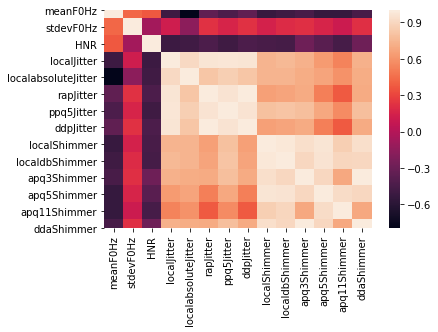

In [30]:
df_new = df.drop(columns = ['voiceID','duration','label'])
df_new.dtypes
#df_new = pd.to_numeric(df_new)


for k in list(df_new):
    df_new[k]=pd.to_numeric(df_new[k], errors='ignore')
df_new.dtypes

corr = df_new.corr()
heat_map = sns.heatmap(corr)

In [34]:
## Heatmap

SyntaxError: invalid syntax (<ipython-input-34-eb1ef426792c>, line 2)

In [37]:
from minisom import MiniSom

In [45]:
data = df_new.to_numpy()
som = MiniSom(6, 6, 14, sigma=0.3, learning_rate=0.5)
som.train_random(data, 100)

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, data)

TypeError: only integer scalar arrays can be converted to a scalar index